In [6]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [37]:
# Loading The DataSet
data = pd.read_csv('COFORGE.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-22,1318.000000,1323.000000,1306.800049,1319.099976,1240.621704,356884
1,2019-04-23,1315.099976,1318.000000,1300.550049,1303.650024,1226.090820,203428
2,2019-04-24,1301.050049,1314.750000,1298.800049,1309.650024,1231.733887,152965
3,2019-04-25,1313.000000,1313.000000,1296.550049,1301.349976,1223.927612,230304
4,2019-04-26,1302.000000,1321.000000,1296.000000,1314.000000,1235.825317,266749
...,...,...,...,...,...,...,...
1230,2024-04-12,5685.000000,5719.500000,5600.000000,5616.250000,5616.250000,323488
1231,2024-04-15,5515.000000,5585.250000,5373.899902,5396.200195,5396.200195,546918
1232,2024-04-16,5352.950195,5354.000000,5200.000000,5209.899902,5209.899902,591551
1233,2024-04-18,5228.000000,5311.000000,5175.000000,5206.899902,5206.899902,531498


<Axes: >

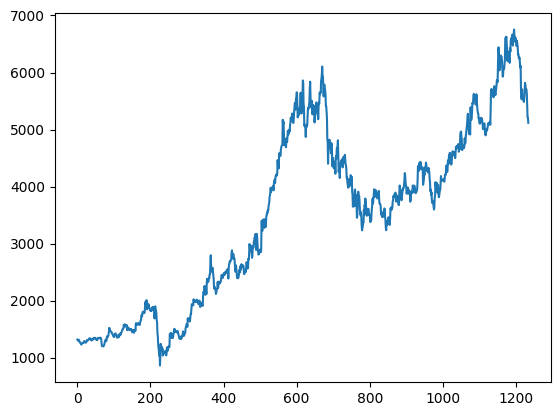

In [38]:
#to show data in graph
data['Close'].plot()

In [39]:
train_data = pd.read_csv('COFORGE1.csv')
test_data = pd.read_csv('COFORGE2.csv')

In [53]:
# train_data1 = data.iloc[:int(.99*len(data)), :]
# test_data1 = data.iloc[:int(.99*len(data)):, :]

In [54]:
#defineing the features and the target variable
features = ['Open', 'Volume']
target = 'Close'

In [42]:
#create and train the model
model = xgb.XGBRFRegressor() #cause we gonna be using regression here
model.fit(train_data[features], train_data[target])

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [49]:
#Make and show the predictions on the test data
predictions = model.predict(test_data[features])
print('MOdel Predictions: ')
print(predictions)

MOdel Predictions: 
[3825.277  3844.5144 3920.03   3934.8364 3978.9287 4023.4834 4209.432
 3984.6826 4059.496  4028.1    3989.1572 4010.2336 4040.1353 4142.5215
 4100.607  4025.2886 4062.6387 4170.516  4100.1377 4122.8804 4103.243
 4170.2036 4151.127  4122.296  4248.7256 4393.42   4174.155  4280.6494
 4535.5864 4507.623  4802.264  4527.468  4183.315  4333.6753 4184.591
 4102.975  4381.078  4555.7954 4836.209  4707.9653 4803.482  4451.1064
 4624.7754 4625.369  4593.322  4190.9795 4622.77   4749.8647 4753.9536
 4825.687  4816.443  4821.6006 4587.8813 4729.3394 4830.2    4647.355
 4722.2085 4735.8794 4777.461  4852.0938 4848.6704 4826.551  4808.545
 4720.088  4690.1816 4891.985  4852.456  4861.7    4576.503  4861.4307
 4681.2417 4900.11   4732.7397 4798.7656 4958.0767 4935.062  4804.2954
 4808.466  5099.328  5171.256  5256.245  5122.21   4857.969  4922.39
 5041.266  4844.1626 4564.193  4851.5864 5171.256  4906.0996 5244.8623
 5075.4077 5144.8716 5308.342  5075.2695 5294.042  5203.306  531

In [51]:
#show the actual values
print('Actual Values: ')
print(test_data[target])

Actual Values: 
0      3830.750000
1      3891.600098
2      3929.949951
3      3943.699951
4      4051.300049
          ...     
240    5616.250000
241    5396.200195
242    5209.899902
243    5206.899902
244    5118.149902
Name: Close, Length: 245, dtype: float64


In [50]:
#Showing the Model's Accuracy
accuracy = model.score(test_data[features], test_data[target])
print('Accuracy: ')
print(accuracy*100)

Accuracy: 
42.75627183779046


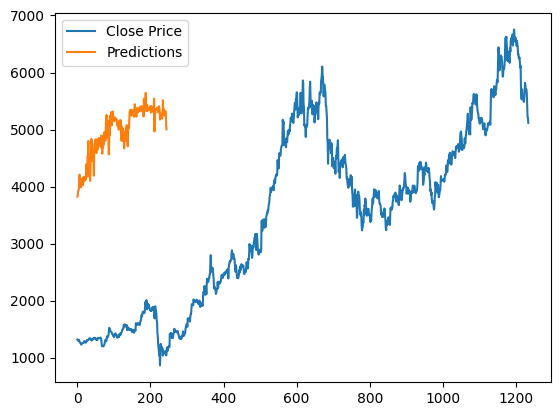

In [52]:
#plot the predictions and the close price
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()